# **서울시 공무원 업무추진비 사용 패턴 분석**

## 1. 프로젝트 소개
서울시는 업무 추진에 대한 비용 집행의 투명성을 제공하고자 공개된 시장단을 비롯하여 4급 부서장 이상의 간부직 고무원의 업무 추진비 집행내역을 공개한다.  
**https://opengov.seoul.go.kr/expense**  
위에서 데이터를 받았고, 본 프로젝트에서는 **2021년 1월 ~ 5월**의 데이터만 사용했다.

## 2. 목적
이 프로젝트를 통해 다음을 알아보고자 한다.
1. 자주 이용한 시간과 요일을 확인함으로 어떤 목적으로 사용했는지 유추한다.
2. 자주 이용한 장소를 확인함으로 맛집인 곳을 유추한다.

## 3. EDA 및 전처리 과정

In [1]:
import warnings                              
warnings.filterwarnings('ignore')                 # 경고 메시지를 출력하지 않게 한다. 
import numpy as np                                # 수치 계산 도구
import pandas as pd                               # 데이터 분석 도구
import matplotlib.pyplot as plt                   # 시각화 도구
plt.rcParams['font.size'] = 15                    # matplotlib의 글꼴 크기
plt.rcParams['font.family'] = 'NanumGothicCoding' # matplotlib의 글꼴
import matplotlib as mpl            
mpl.rcParams['axes.unicode_minus'] = False        # 음수 데이터가 깨지지 않게 한다
import seaborn as sns                           # matplotlib를 기반으로 만든 시각화 도구
from wordcloud import WordCloud     # 한글
from plotnine import *          # R의 ggplot2 패키지를 사용하는 것처럼 사용하는 시각화 도구
import missingno as msno            # 결측치 분포를 그래프 형태로 시각화 하는 도구
import folium                       # 지도 시각화 도구

In [2]:
# 데이퍼프레임 생성
df = pd.read_csv('./expense_list.csv', encoding='UTF-8')
df

,소속부서,구분,부서명,대상인원,일시,사용장소,목적,결제방법,금액
0,물재생센터,NaN,중랑물재생센터 관리과,"김광옥, 김용성",2021-01-25 0:00,NaN,소속직원 경조사비,현금,100000
1,물재생센터,NaN,중랑물재생센터 운영과,NaN,2021-01-22 0:00,복시루,운영과 다과구매-전출직원선물,카드,90000
2,물재생센터,NaN,중랑물재생센터 시설보수과,시설보수과장외 27명,2021-01-21 0:00,떡시루,소속직원 송별떡,카드,80000
3,물재생센터,NaN,중랑물재생센터 운영과,NaN,2021-01-21 0:00,서울시청매점,운영과 다과구매-전출직원선물,제로페이,48000
4,물재생센터,NaN,중랑물재생센터 운영과,NaN,2021-01-21 0:00,복시루,운영과 다과구매-전출직원선물,카드,75000
...,...,...,...,...,...,...,...,...,...
29321,주택건축본부,NaN,주택건축본부 주거사업과,과장외3명,2021-05-04 12:09,배재반점,제4차 도시재정비위원회 상정 안건 사전검토 간담회 비용 지출,제로페이,63000
29322,주택건축본부,NaN,주택건축본부 주거사업과,과장외3명,2021-05-03 12:04,비에이치씨,재정비촉진지구 존치구역 주택정비방안 용역 관계자 간담회 비용 지출,제로페이,57000
29323,어린이병원,NaN,어린이병원 간호부,김금이 외 164명,2021-05-18 12:34,농협하나로마트양재점,간호부 운영을 위한 직원 격려 물품 구입,카드,400790
29324,어린이병원,NaN,어린이병원 간호부,박경옥 외 3명,2021-05-11 18:10,"갈비사랑 서초구 강남대로 204, 양재동",코로나19 대응 관련 직원 격려,카드,120000


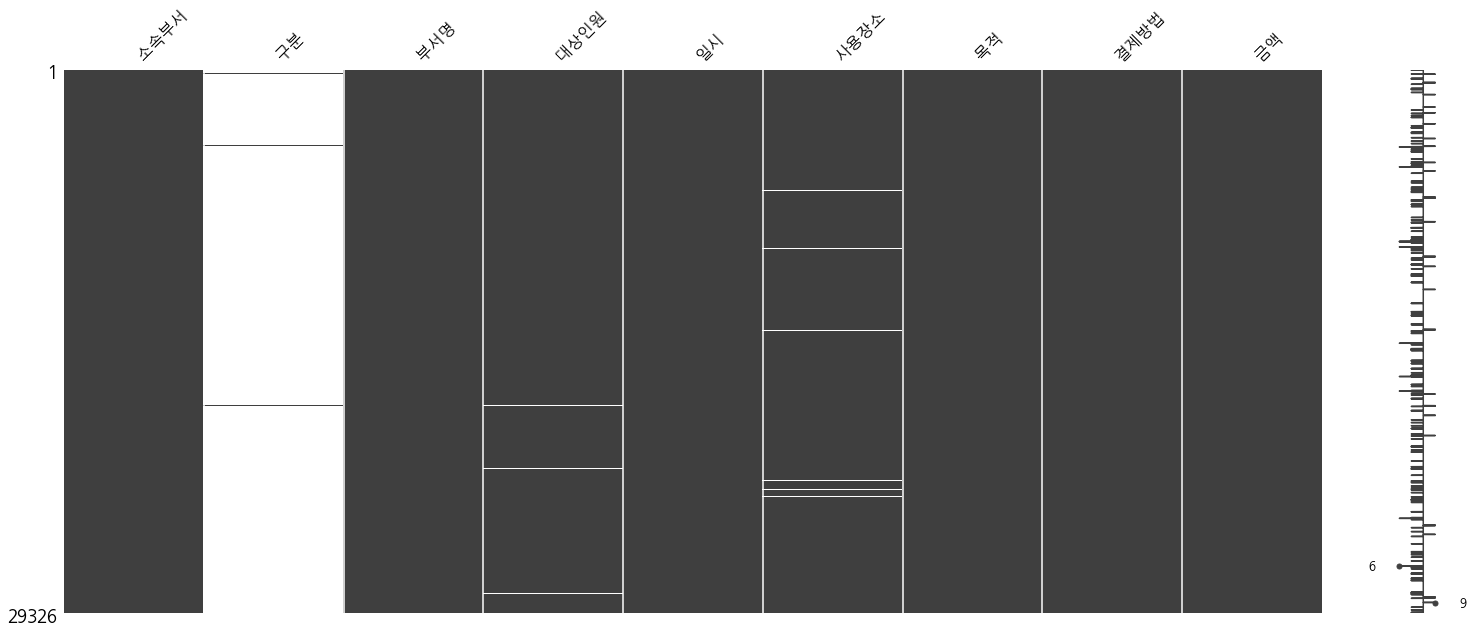

In [3]:
# missingno 패키지로 결측치를 시각화 해본다.
msno.matrix(df);

In [4]:
# 결측치의 수를 확인해본다.
df.isnull().sum()

소속부서        0
구분      28990
부서명         0
대상인원      103
일시          0
사용장소      272
목적          0
결제방법        0
금액          0
dtype: int64

In [5]:
# 특정 열에서 나타나는 NaN(결측치)를 확인해본다.
df[df['대상인원'].isnull()]

,소속부서,구분,부서명,대상인원,일시,사용장소,목적,결제방법,금액
1,물재생센터,NaN,중랑물재생센터 운영과,NaN,2021-01-22 0:00,복시루,운영과 다과구매-전출직원선물,카드,90000
3,물재생센터,NaN,중랑물재생센터 운영과,NaN,2021-01-21 0:00,서울시청매점,운영과 다과구매-전출직원선물,제로페이,48000
4,물재생센터,NaN,중랑물재생센터 운영과,NaN,2021-01-21 0:00,복시루,운영과 다과구매-전출직원선물,카드,75000
5,물재생센터,NaN,중랑물재생센터 운영과,NaN,2021-01-20 0:00,이마트 왕십리점,운영과 회의용 음료 및 간식구매,제로페이,203350
7,물재생센터,NaN,중랑물재생센터 관리과,NaN,2021-01-19 0:00,이마트 왕십리점,부서운영 및 내방객용 다과류구매,카드,184350
...,...,...,...,...,...,...,...,...,...
28316,행정국,NaN,행정국 총무과,NaN,2021-05-20 13:24,KCP-결제,부서직원용 네스카페 커피캡슐 구매,카드,166800
28317,행정국,NaN,행정국 총무과,NaN,2021-05-13 11:35,쿠팡-쿠팡,부서직원용 커피원두 등 구매,카드,182000
28318,행정국,NaN,행정국 총무과,NaN,2021-05-04 16:45,G마켓,부서직원용 음료 및 다과 구매,카드,68700
28468,서울특별시장,현업-우수부서 격려 등,행정국 총무과(서울특별시장),NaN,2021-05-18 16:48,예원플라워,"518민주항쟁 근조화환 설치비용 지급(서울,광주)",카드,300000


In [6]:
df[df['사용장소'].isnull()]

,소속부서,구분,부서명,대상인원,일시,사용장소,목적,결제방법,금액
0,물재생센터,NaN,중랑물재생센터 관리과,"김광옥, 김용성",2021-01-25 0:00,NaN,소속직원 경조사비,현금,100000
228,서울공예박물관,NaN,서울공예박물관 총무과,공예박물관 관장,2021-01-25 0:00,NaN,문화체육관광위원회 위원 경조사비 지급,현금,50000
466,상수도사업본부,NaN,상수도사업본부 경영관리부,자재센터소장 정임근 빙모상,2021-01-21 0:00,NaN,소속 상근직원의 경조사비 지급(부본부장-자재소장 정임근 빙모상),현금,50000
467,상수도사업본부,NaN,상수도사업본부 경영관리부,자재센터소장 정임근 빙모상,2021-01-21 0:00,NaN,소속 상근직원의 경조사비 지급(본부장-자재소장 정임근 빙모상),현금,50000
489,상수도사업본부,NaN,상수도사업본부 경영관리부,중부수도사업소장 김정애 시부상,2021-01-11 0:00,NaN,유관부서 직원의 경조사비 지급(경영부장- 중부수도소장 김정애),현금,50000
...,...,...,...,...,...,...,...,...,...
28482,서울특별시장,현업-우수부서 격려 등,행정국 총무과(서울특별시장),유족,2021-05-06 0:00,NaN,사망직원 유족위로금,현금,1000000
28516,상수도사업본부,NaN,상수도사업본부 서부수도사업소 행정지원과,소장,2021-05-31 0:00,NaN,소속 직원 경조사비 지급,현금,50000
28997,소방재난본부,NaN,소방재난본부 소방행정과,상근직원 경조사,2021-05-18 0:00,NaN,경조사비(조의금) 지급,현금,50000
29138,감사위원회,NaN,감사위원회 감사담당관,감사위원장,2021-05-22 0:00,NaN,감사위원회 소속 직원 경조사비 지급,현금,50000


1. 대상인원이 NaN인 경우 -> 부서 간식 비용
2. 사용장소가 NaN인 경우 -> 경조사비용  

두 컬럼에서 NaN값이 들어간 데이터는 본 프로젝트에는 필요없는 데이터임을 확인했으니 지우도록 한다.

In [7]:
df.dropna(subset=['대상인원','사용장소'], inplace=True)
df

,소속부서,구분,부서명,대상인원,일시,사용장소,목적,결제방법,금액
2,물재생센터,NaN,중랑물재생센터 시설보수과,시설보수과장외 27명,2021-01-21 0:00,떡시루,소속직원 송별떡,카드,80000
6,물재생센터,NaN,중랑물재생센터 시설보수과,시설보수과장외 16명,2021-01-19 0:00,이마트,커피구입비용,제로페이,160950
8,물재생센터,NaN,중랑물재생센터 시설보수과,시설보수과장외 16명,2021-01-14 0:00,이지커피,커피(렌탈)비용지출,카드,100000
9,물재생센터,NaN,중랑물재생센터 시설보수과,정종영외 5명,2021-01-13 0:00,더드림마트,시설보수과 scr회의용 음료구매,카드,12000
10,물재생센터,NaN,중랑물재생센터 운영과,운영과장 외 3명,2021-01-07 0:00,가장맛있는족발 장한평역점,운영과 직원 간담회비,카드,100000
...,...,...,...,...,...,...,...,...,...
29321,주택건축본부,NaN,주택건축본부 주거사업과,과장외3명,2021-05-04 12:09,배재반점,제4차 도시재정비위원회 상정 안건 사전검토 간담회 비용 지출,제로페이,63000
29322,주택건축본부,NaN,주택건축본부 주거사업과,과장외3명,2021-05-03 12:04,비에이치씨,재정비촉진지구 존치구역 주택정비방안 용역 관계자 간담회 비용 지출,제로페이,57000
29323,어린이병원,NaN,어린이병원 간호부,김금이 외 164명,2021-05-18 12:34,농협하나로마트양재점,간호부 운영을 위한 직원 격려 물품 구입,카드,400790
29324,어린이병원,NaN,어린이병원 간호부,박경옥 외 3명,2021-05-11 18:10,"갈비사랑 서초구 강남대로 204, 양재동",코로나19 대응 관련 직원 격려,카드,120000


## 4. 사용시간에 따른 데이터 시각화 (막대그래프 이용)

In [8]:
# 집행일시 열을 이용해서 '연, '월', '일', '시', '분', '요일' 파생 변수를 만든다.
df['일시'] = pd.to_datetime(df['일시'])
df['연'] = df['일시'].dt.year.astype(int)
df['월'] = df['일시'].dt.month.astype(int)
df['일'] = df['일시'].dt.day.astype(int)
df['시'] = df['일시'].dt.hour.astype(int)
df['분'] = df['일시'].dt.minute.astype(int)
df['요일'] = df['일시'].dt.dayofweek.astype(int)
# 0-월, 1-화, 2-수, 3-목, 4-금, 5-토, 6-일
df

,소속부서,구분,부서명,대상인원,일시,사용장소,목적,결제방법,금액,연,월,일,시,분,요일
2,물재생센터,NaN,중랑물재생센터 시설보수과,시설보수과장외 27명,2021-01-21 00:00:00,떡시루,소속직원 송별떡,카드,80000,2021,1,21,0,0,3
6,물재생센터,NaN,중랑물재생센터 시설보수과,시설보수과장외 16명,2021-01-19 00:00:00,이마트,커피구입비용,제로페이,160950,2021,1,19,0,0,1
8,물재생센터,NaN,중랑물재생센터 시설보수과,시설보수과장외 16명,2021-01-14 00:00:00,이지커피,커피(렌탈)비용지출,카드,100000,2021,1,14,0,0,3
9,물재생센터,NaN,중랑물재생센터 시설보수과,정종영외 5명,2021-01-13 00:00:00,더드림마트,시설보수과 scr회의용 음료구매,카드,12000,2021,1,13,0,0,2
10,물재생센터,NaN,중랑물재생센터 운영과,운영과장 외 3명,2021-01-07 00:00:00,가장맛있는족발 장한평역점,운영과 직원 간담회비,카드,100000,2021,1,7,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29321,주택건축본부,NaN,주택건축본부 주거사업과,과장외3명,2021-05-04 12:09:00,배재반점,제4차 도시재정비위원회 상정 안건 사전검토 간담회 비용 지출,제로페이,63000,2021,5,4,12,9,1
29322,주택건축본부,NaN,주택건축본부 주거사업과,과장외3명,2021-05-03 12:04:00,비에이치씨,재정비촉진지구 존치구역 주택정비방안 용역 관계자 간담회 비용 지출,제로페이,57000,2021,5,3,12,4,0
29323,어린이병원,NaN,어린이병원 간호부,김금이 외 164명,2021-05-18 12:34:00,농협하나로마트양재점,간호부 운영을 위한 직원 격려 물품 구입,카드,400790,2021,5,18,12,34,1
29324,어린이병원,NaN,어린이병원 간호부,박경옥 외 3명,2021-05-11 18:10:00,"갈비사랑 서초구 강남대로 204, 양재동",코로나19 대응 관련 직원 격려,카드,120000,2021,5,11,18,10,1


 1) 월별 사용 횟수 그래프

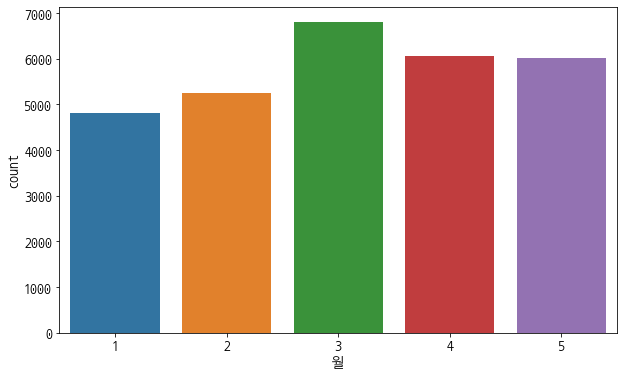

In [9]:
plt.rcParams['figure.figsize'] = [10,6]
plt.rc('font', size=14)
sns.countplot(data=df, x='월');

 2) 시간별 사용 횟수 그래프

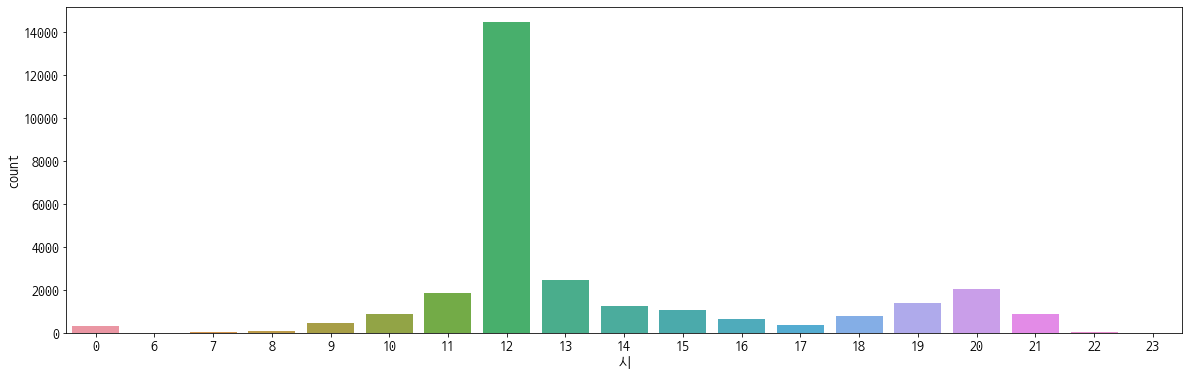

In [10]:
plt.rcParams['figure.figsize'] = [20,6]
plt.rc('font', size=14)
sns.countplot(data=df, x='시');

3) 요일별 사용 횟수 그래프

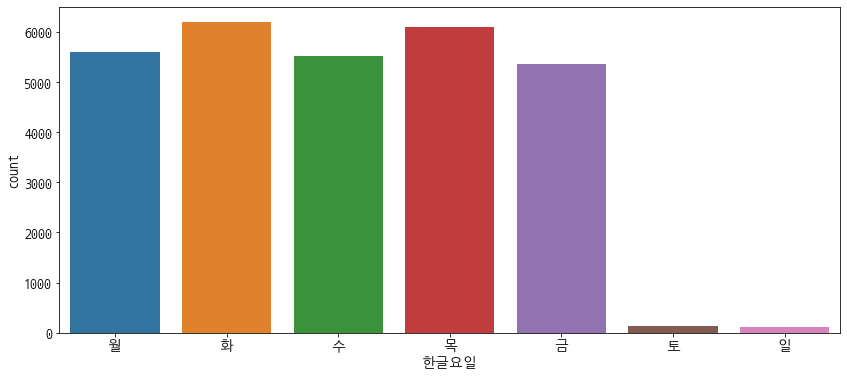

In [11]:
# 요일 이름을 딕셔러니로 만들고 파생변수를 만들어 요일을 한글로 바꿔준다.
weekday_map = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
df['한글요일'] = df['요일'].apply(lambda x: weekday_map[x])

plt.rcParams['figure.figsize'] = [14,6]
plt.rc('font', size=14)
sns.countplot(data=df.sort_values(by='요일'), x='한글요일');

## 5. 사용장소에 따른 데이터 시각화 (워드 클라우드)

In [12]:
# 사용장소가 누락값인 데이터를 확인 -> 지금은 위에서 모두 삭제 했으니 없는것이 당연!
# 있었다면 공란으로 바꾸고 진행
df[df['사용장소'].isnull()]

,소속부서,구분,부서명,대상인원,일시,사용장소,목적,결제방법,금액,연,월,일,시,분,요일,한글요일


In [13]:
# 사용장소가 공란인 데이터를 확인
df.loc[df['사용장소']=='', '사용장소']

Series([], Name: 사용장소, dtype: object)

In [14]:
# 사용장소가 '-'인 데이터를 확인
df.loc[df['사용장소']=='-' , '사용장소']

985      -
1870     -
1871     -
1872     -
1873     -
        ..
25328    -
25329    -
25616    -
25618    -
25625    -
Name: 사용장소, Length: 87, dtype: object

In [15]:
# 사용장소가 공란, '-' 인 경우는 NaN값 처럼 경조사비용으로 사용한 데이터이므로 제거한다.
df_shop = df[(df['사용장소'] != '') & (df['사용장소'] != '-')]
df_shop

,소속부서,구분,부서명,대상인원,일시,사용장소,목적,결제방법,금액,연,월,일,시,분,요일,한글요일
2,물재생센터,NaN,중랑물재생센터 시설보수과,시설보수과장외 27명,2021-01-21 00:00:00,떡시루,소속직원 송별떡,카드,80000,2021,1,21,0,0,3,목
6,물재생센터,NaN,중랑물재생센터 시설보수과,시설보수과장외 16명,2021-01-19 00:00:00,이마트,커피구입비용,제로페이,160950,2021,1,19,0,0,1,화
8,물재생센터,NaN,중랑물재생센터 시설보수과,시설보수과장외 16명,2021-01-14 00:00:00,이지커피,커피(렌탈)비용지출,카드,100000,2021,1,14,0,0,3,목
9,물재생센터,NaN,중랑물재생센터 시설보수과,정종영외 5명,2021-01-13 00:00:00,더드림마트,시설보수과 scr회의용 음료구매,카드,12000,2021,1,13,0,0,2,수
10,물재생센터,NaN,중랑물재생센터 운영과,운영과장 외 3명,2021-01-07 00:00:00,가장맛있는족발 장한평역점,운영과 직원 간담회비,카드,100000,2021,1,7,0,0,3,목
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29321,주택건축본부,NaN,주택건축본부 주거사업과,과장외3명,2021-05-04 12:09:00,배재반점,제4차 도시재정비위원회 상정 안건 사전검토 간담회 비용 지출,제로페이,63000,2021,5,4,12,9,1,화
29322,주택건축본부,NaN,주택건축본부 주거사업과,과장외3명,2021-05-03 12:04:00,비에이치씨,재정비촉진지구 존치구역 주택정비방안 용역 관계자 간담회 비용 지출,제로페이,57000,2021,5,3,12,4,0,월
29323,어린이병원,NaN,어린이병원 간호부,김금이 외 164명,2021-05-18 12:34:00,농협하나로마트양재점,간호부 운영을 위한 직원 격려 물품 구입,카드,400790,2021,5,18,12,34,1,화
29324,어린이병원,NaN,어린이병원 간호부,박경옥 외 3명,2021-05-11 18:10:00,"갈비사랑 서초구 강남대로 204, 양재동",코로나19 대응 관련 직원 격려,카드,120000,2021,5,11,18,10,1,화


In [16]:
df_shop['사용장소'].value_counts()

구이구이                 229
삼우정                  206
참숯골                  201
우도일식                 186
창고43                 157
                    ... 
홍루이젠 경희궁자이점            1
메이탄 광진구 광나루로  590      1
마르셀 광화문                1
이모네                    1
홍제양꼬치                  1
Name: 사용장소, Length: 8257, dtype: int64

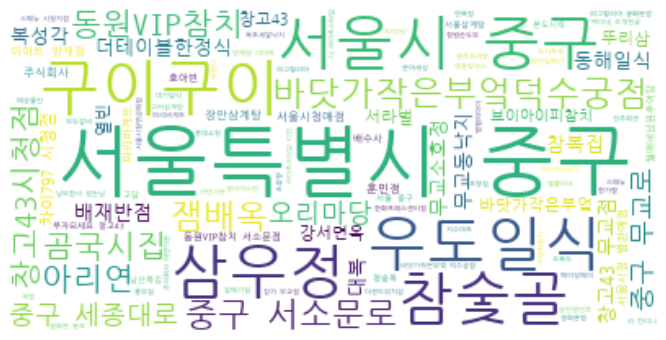

In [17]:
wordcloud = WordCloud(
    font_path='C:\\Users\\JaeIn\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(df['사용장소']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 6. 결론 및 제언
#### 1) 사용 일자별 업무 추진비 사용
- 시간 기준으로 보면 **낮 12시**에 극단적으로 몰려있다.
- 요일 기준으로 보면 **평일**에 대부분 사용했다.
- 위 두가지 내용으로 보아 주로 **평일 점심에 부서회식** 용도로 사용했음을 짐작할 수 있다.
- 이와 별개로 0시에 사용한 내역이 있는 것으로 보아, 애초에 데이터의 시간이 잘못 입력된 것도 있던것 같다.
- 이런 문제는 데이터 상태에 아쉬움을 주며, <u>데이터의 신뢰성에도 문제가 생길 수 있다는 점</u> 을 생각해보게 되었다.
  
#### 2) 사용 장소별 업무 추진비 사용
- 삼우정, 우도일식, 참숯골, 구이구이가 크게 표시되면서 많이 이용한 곳임을 직관적으로 알 수 있다.
- 하지만 사용 장소 컬럼에 주소를 넣은 데이터가 많아서 워드 클라우드에 주소 관련 문구가 나오게 됐다.
- 통일되지 않은 자료들은 전처리를 하는것도 힘들지만, <u>정상적인 분석결과를 기대하기 어려울 수도 있다는 점</u> 을 생각해보게 되었다.
